In [28]:
import numpy as np
import matplotlib.pyplot as plt
import dmp_discrete

In [98]:
data = np.load('arr_0.npy').T
y_des = data - data[:, 0][:, None]

y_des = y_des[:, 18:50]
print(y_des.shape)
a = np.array([[np.linspace(y_des[0, 0], y_des[0, 29], 30)], 
             [np.linspace(y_des[1, 0], y_des[1, 29], 30)]])
a = np.reshape(a, [2, 30])
plt.figure(1, figsize=(6, 6))
plt.plot(y_des[0, :], y_des[1, :], 'r', lw=2)
plt.plot(a[0, :], a[1, :], 'k', lw=2)

(2, 32)


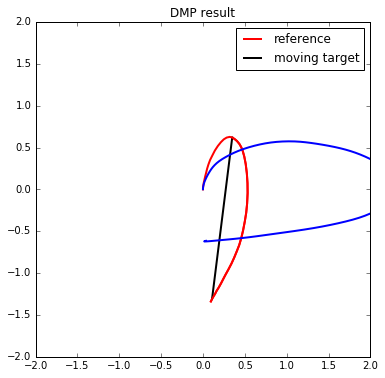

In [99]:
data = np.load('arr_0.npy').T
y_des = data - data[:, 0][:, None]
y_des = y_des[:, 18:50]

runTime = 1.0
dt = 0.01
n_dmps = 2
n_bfs = 500
a_y = np.ones(n_dmps)*10.0

dmp = dmp_discrete.DMP_discrete(dt=dt, runTime=runTime, n_dmps=n_dmps, n_bfs=n_bfs, a_y=a_y)

dmp.imitate_path(y_des=y_des)

y = []
y_traj = np.zeros((dmp.n_step, dmp.n_dmps))
dmp.reset()
for i in range(dmp.n_step):
    y_traj, _, _ = dmp.step()
    y.append(np.copy(y_traj))
    
    dmp.goal += np.array([1*1e-2, 1*1e-2])
y = np.array(y)

# plt.figure(1, figsize=(6,6))
plt.plot(y_des[0, :], y_des[1, :], 'r', lw=2)
plt.plot(y[:, 0], y[:, 1], 'b', lw=2)
plt.title('DMP result')
plt.axis('equal')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.legend(['reference', 'moving target'])
plt.show()
